In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
data = pd.read_csv("housing.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [123]:
data.dropna(inplace = True)

In [124]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'],axis =1)
y = data['median_house_value']



In [125]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.6)

In [126]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17423,-120.45,34.64,27.0,2696.0,622.0,1322.0,543.0,3.0352,NEAR OCEAN,135400.0
16969,-122.31,37.54,42.0,1159.0,261.0,465.0,247.0,3.1842,NEAR OCEAN,352800.0
3188,-119.78,36.33,16.0,1006.0,212.0,515.0,200.0,3.2386,INLAND,112500.0
16752,-122.46,37.70,42.0,876.0,216.0,713.0,203.0,3.8400,NEAR OCEAN,235900.0
14603,-117.16,32.80,22.0,2259.0,634.0,1213.0,601.0,2.5000,NEAR OCEAN,177800.0
...,...,...,...,...,...,...,...,...,...,...
18725,-122.32,40.58,2.0,1937.0,350.0,756.0,274.0,3.0000,INLAND,114200.0
13851,-117.31,34.51,18.0,2704.0,698.0,1611.0,597.0,2.0243,INLAND,82300.0
20179,-119.22,34.34,29.0,3128.0,672.0,1815.0,648.0,2.9821,NEAR OCEAN,175700.0
6077,-117.85,34.10,22.0,5179.0,944.0,2315.0,884.0,4.5100,<1H OCEAN,189900.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

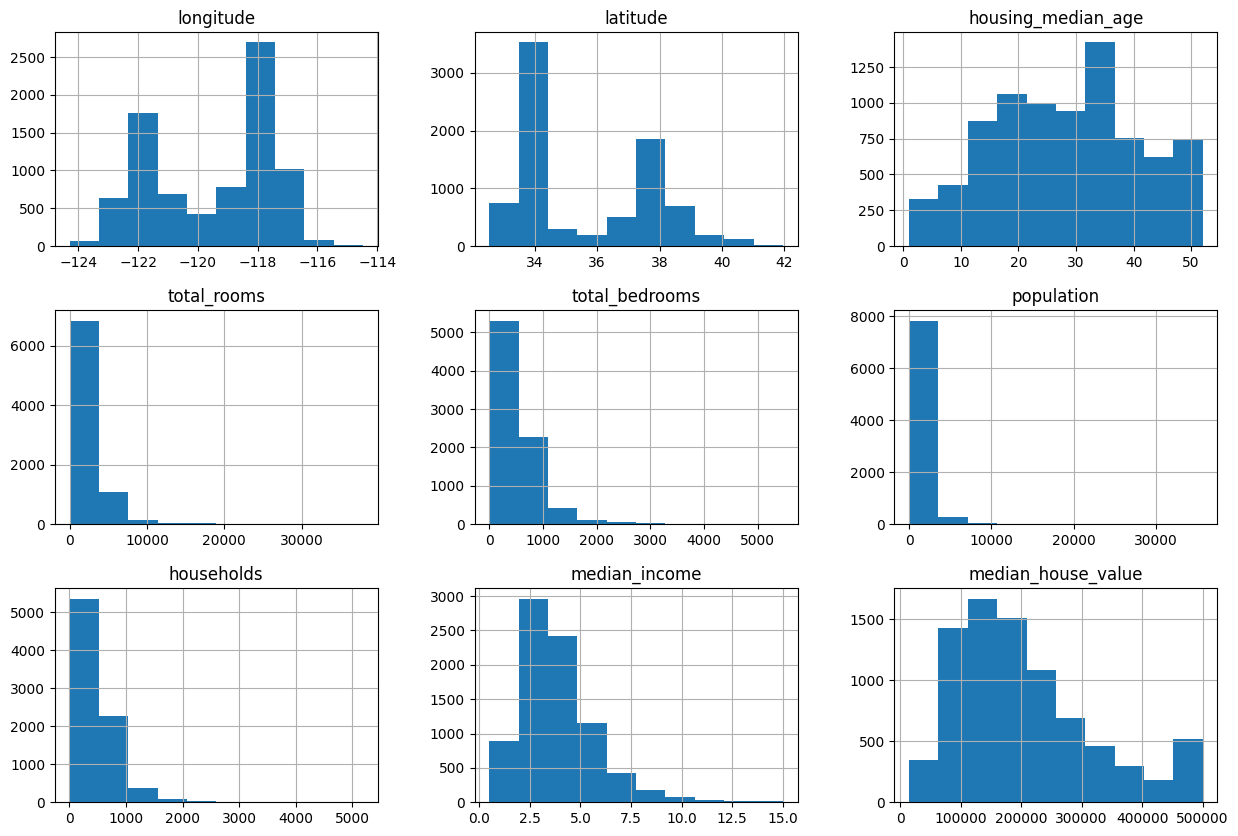

In [127]:
train_data.hist(figsize = (15,10))

/var/folders/bc/0y423p7s3_s5t2x1hpgpzlhh0000gn/T/ipykernel_41548/2101111590.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot = True,cmap="YlGnBu")


<Axes: >

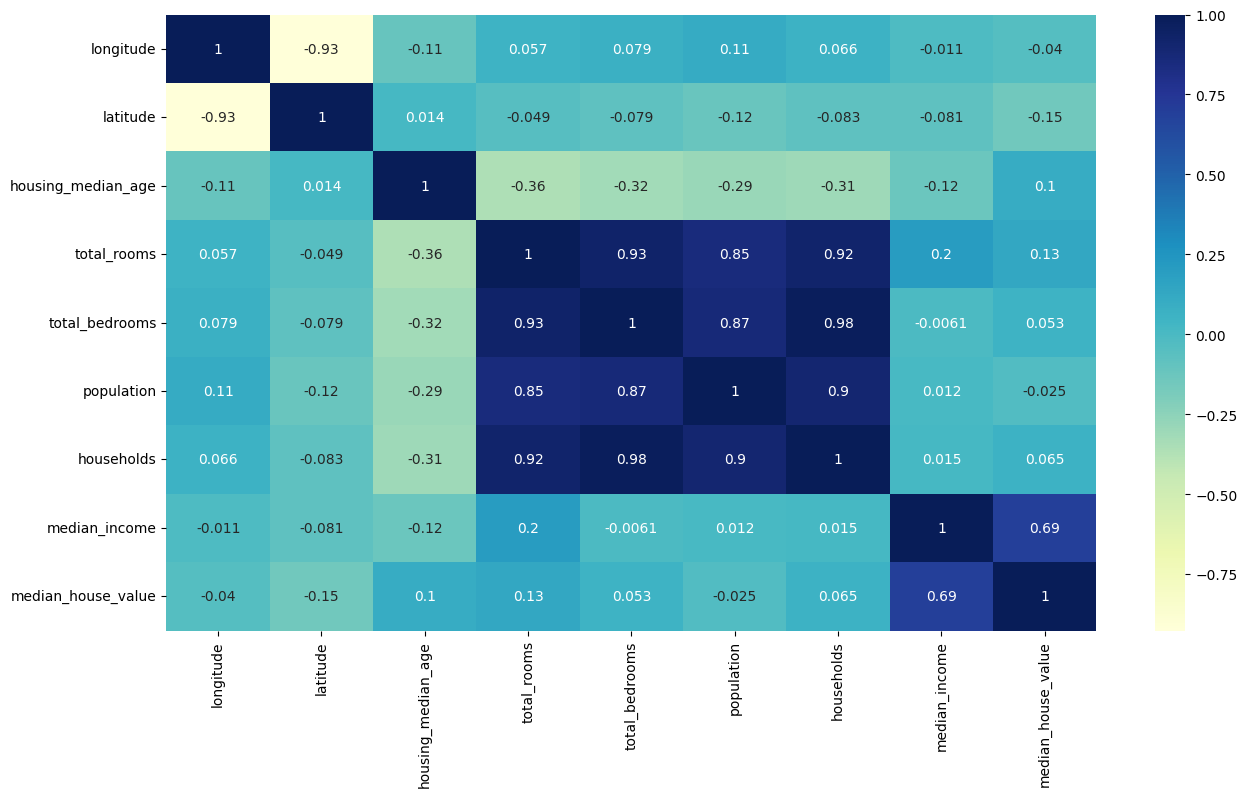

In [128]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(),annot = True,cmap="YlGnBu")

In [129]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

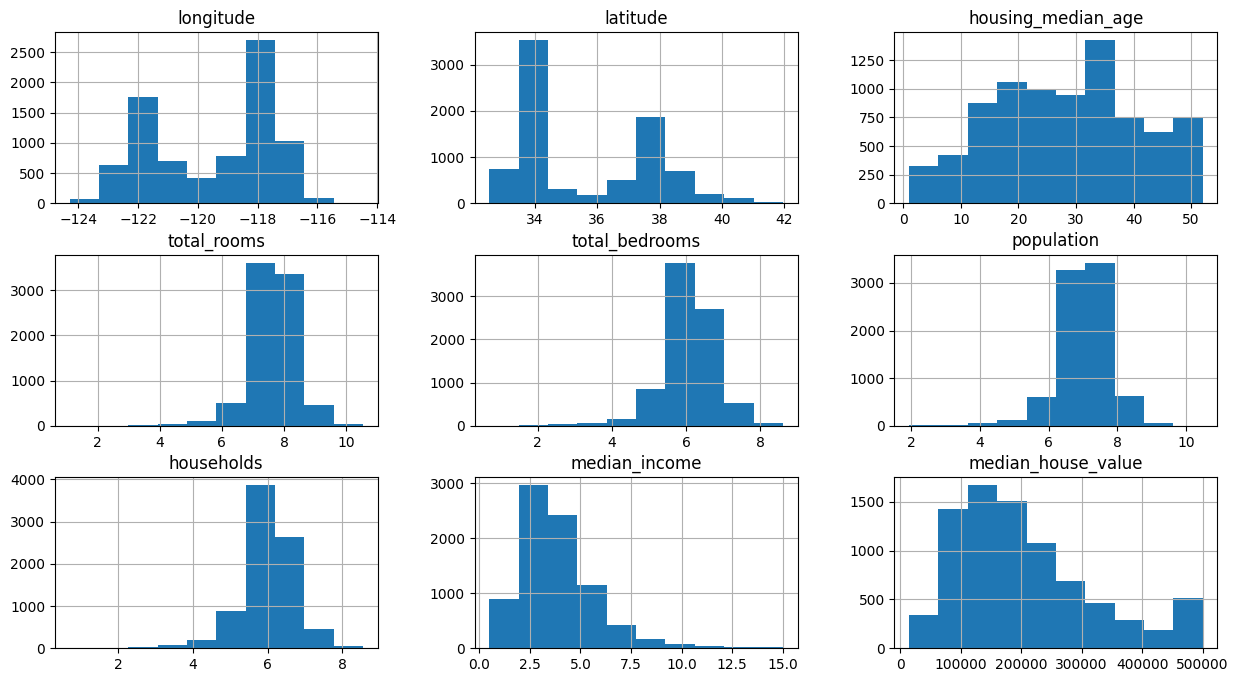

In [130]:
train_data.hist(figsize = (15,8))

In [131]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis =1)

In [132]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17423,-120.45,34.64,27.0,7.899895,6.434547,7.187657,6.298949,3.0352,135400.0,0,0,0,0,1
16969,-122.31,37.54,42.0,7.056175,5.568345,6.144186,5.513429,3.1842,352800.0,0,0,0,0,1
3188,-119.78,36.33,16.0,6.914731,5.361292,6.246107,5.303305,3.2386,112500.0,0,1,0,0,0
16752,-122.46,37.70,42.0,6.776507,5.379897,6.570883,5.318120,3.8400,235900.0,0,0,0,0,1
14603,-117.16,32.80,22.0,7.723120,6.453625,7.101676,6.400257,2.5000,177800.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18725,-122.32,40.58,2.0,7.569412,5.860786,6.629363,5.616771,3.0000,114200.0,0,1,0,0,0
13851,-117.31,34.51,18.0,7.902857,6.549651,7.385231,6.393591,2.0243,82300.0,0,1,0,0,0
20179,-119.22,34.34,29.0,8.048469,6.511745,7.504392,6.475433,2.9821,175700.0,0,0,0,0,1
6077,-117.85,34.10,22.0,8.552560,6.851185,7.747597,6.785588,4.5100,189900.0,1,0,0,0,0


<Axes: >

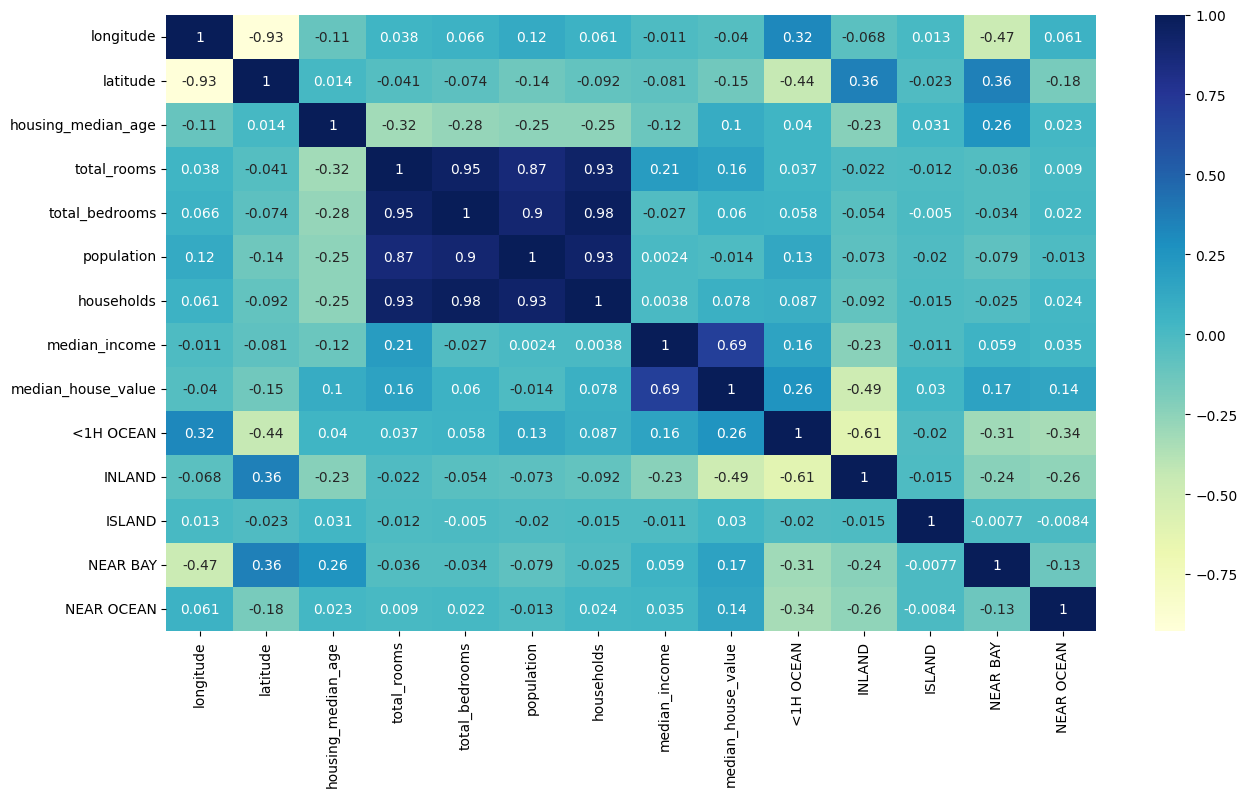

In [133]:
plt.figure(figsize = (15,8))

sns.heatmap(train_data.corr(),annot = True,cmap="YlGnBu")


<Axes: xlabel='latitude', ylabel='longitude'>

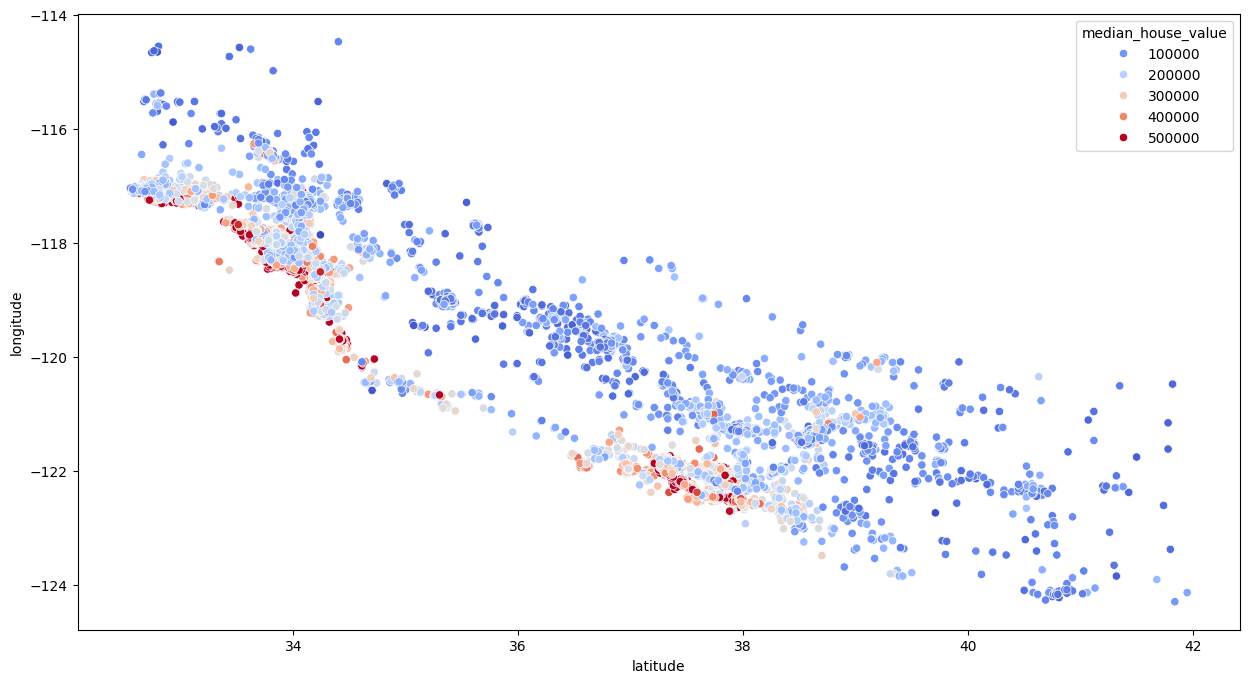

In [134]:
plt.figure(figsize = (15,8))
sns.scatterplot(x='latitude',y= 'longitude',data = train_data, hue = 'median_house_value',palette = 'coolwarm')

In [135]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']

train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

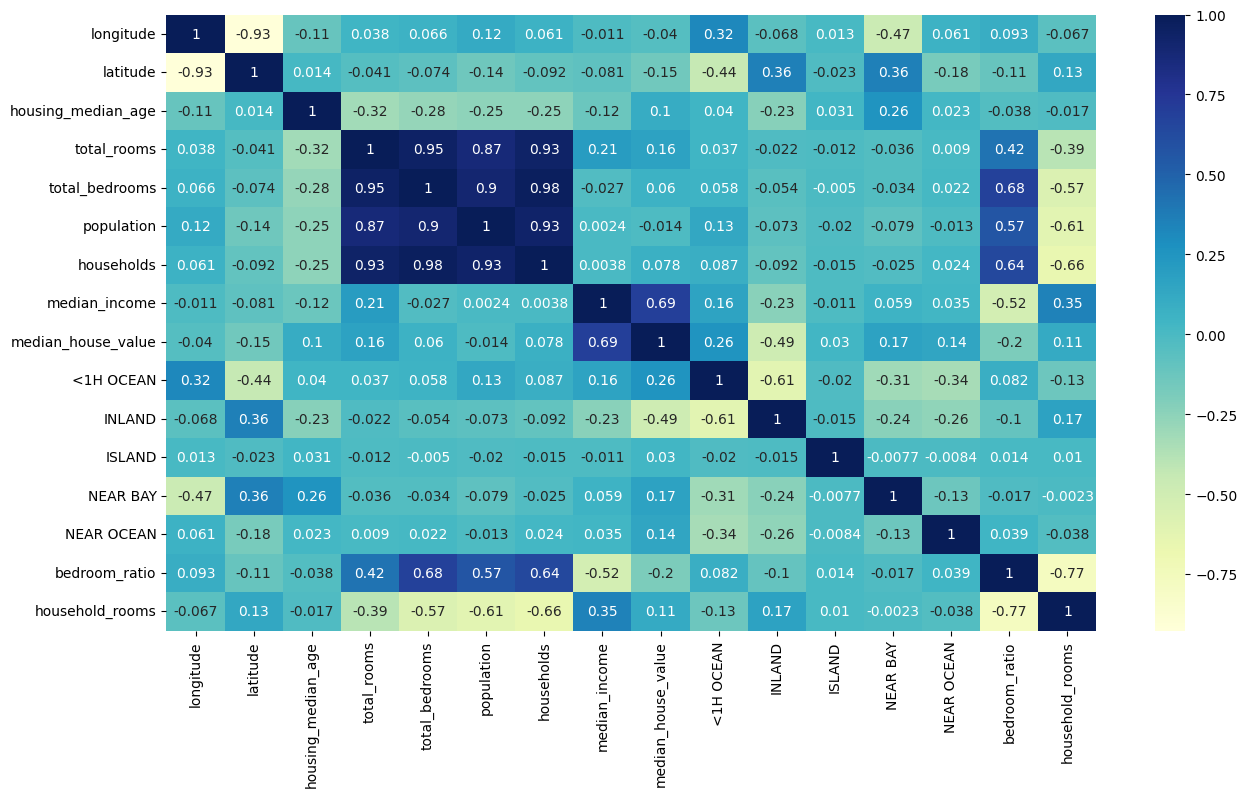

In [136]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(),annot = True,cmap="YlGnBu")

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()



X_train,y_train = train_data.drop(['median_house_value'],axis =1),train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)


reg = LinearRegression()

reg.fit(X_train_s,y_train)



LinearRegression()

In [154]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis =1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']

test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

X_test,y_test = test_data.drop(['median_house_value'],axis =1),test_data['median_house_value']


AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [155]:
X_test_s = scaler.transform(X_test)

In [152]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,median_house_value
7583,-118.22,33.91,27.0,1.976385,1.804211,2.027773,1.807264,2.7426,1,0,0,0,0,0.816390,1.220438,103100.0
10222,-117.89,33.88,33.0,2.124305,1.879324,2.034573,1.869461,5.3836,1,0,0,0,0,0.753226,1.343181,229600.0
6492,-118.01,34.08,30.0,2.167087,1.982322,2.150108,1.976385,3.6531,0,1,0,0,0,0.809484,1.243895,166300.0
16325,-121.33,37.98,10.0,2.122937,1.943973,2.010587,1.924570,2.7031,0,1,0,0,0,0.813859,1.256901,150000.0
4621,-118.31,34.07,40.0,2.184402,2.038404,2.160240,2.030786,2.2653,1,0,0,0,0,0.846933,1.191124,445000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16004,-122.46,37.75,52.0,2.142761,1.896564,2.020931,1.880507,6.5372,0,0,0,1,0,0.752759,1.353819,394000.0
15077,-116.99,32.81,18.0,2.332418,2.119597,2.240540,2.118007,6.2787,1,0,0,0,0,0.787694,1.271825,250000.0
3659,-118.40,34.21,45.0,2.064377,1.825195,1.990469,1.830410,4.8194,1,0,0,0,0,0.756354,1.313943,181300.0
13881,-117.27,34.42,9.0,2.265750,2.068600,2.203929,2.062403,3.2077,0,1,0,0,0,0.800354,1.258345,93300.0


In [156]:

reg.score(X_test_s,y_test)

0.6639891797322591

In [ ]:
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor()

forest.fit(X_train_s,y_train)
forest.score(X_test_s,y_test)


In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [10,20,30]
    #"max_features":[2,4,6],
    #"min_samples_split":[2,4,6,8]
}

grid_search = GridSearchCV(forest,param_grid,cv = 5,
                           scoring = "neg_mean_squared_error",
                           return_train_score = True)

grid_search.fit(X_train_s,y_train)

In [ ]:

best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(X_test_s,y_test)